<a href="https://colab.research.google.com/github/xianyingkong/diffusion-text-generation/blob/simple-diffuseq-0129/embedding_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
from transformers import BertTokenizerFast
import transformers
import os
import torch
import numpy as np

In [ ]:
word_embedding = torch.load('word_embedding.pt', map_location=torch.device('cpu'))

In [ ]:
word_embedding

Parameter containing:
tensor([[-0.5555, -0.0901,  1.1469,  ..., -0.6660, -2.6405, -0.0052],
        [-1.8184, -0.5092,  0.9434,  ...,  1.3924,  1.0179, -0.1013],
        [-0.7059,  0.0151, -2.3545,  ..., -0.1428, -0.1063,  0.4768],
        ...,
        [ 1.1498,  0.7334,  0.0725,  ...,  0.1484,  0.8395, -3.3620],
        [ 1.6328,  1.5051,  1.2920,  ...,  0.3481,  0.7946,  1.3204],
        [ 0.3533, -0.3212, -1.0783,  ...,  1.9004,  0.4433,  0.5947]],
       requires_grad=True)

In [ ]:
# word_embedding_np = word_embedding.numpy()
# word_embedding_np

In [ ]:
# np.savetxt('word_embedding.tsv', word_embedding_np, delimiter = '\t')

In [ ]:
word_embedding.shape

torch.Size([30267, 128])

In [ ]:
words = []
with open("vocab.txt", "r") as f:
  for x in f:
    words.append(x.strip())

In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a8fc4742393f97d7e2cb52ff3b9421cf72374875e43eb5084a85da3d22454966
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
tokenizer = BertTokenizerFast('vocab.txt')
tokenizer

BertTokenizerFast(name_or_path='', vocab_size=30267, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
# type1 = ['he', 'man', 'king', 'father']
# type2 = ['woman', 'she', 'mother', 'her']
# type1 = ['king', 'queen', 'mother', 'father', 'prince', 'princess']
# type2 = ['love', 'die', 'kill', 'poison', 'stab']
type1 = ['love', 'affection', 'adoration', 'devotion', 'fondness']
type2 = ['hate', 'hates', 'hateful', 'loathing', 'loathe']
words = type1 + type2
labels = [1]*len(type1) + [0]*len(type2)
# words = ['sin', 'church', 'commandment', 'love']
# words = ['love', 'loves', 'beloved', 'death', 'deaths']

idx = []
selected_word_embeds = []
vocab_dict = tokenizer.get_vocab()
for i in words:
  idx.append(vocab_dict[i])

for i in idx:
  selected_word_embeds.append(word_embedding[i].detach().numpy())

selected_word_embeds = np.array(selected_word_embeds)

In [ ]:
selected_word_embeds.shape

(10, 128)

In [ ]:
reducer = umap.UMAP(random_state=102, min_dist=0.3, n_components=2, n_neighbors=3, transform_seed=102)

In [ ]:
embedding = reducer.fit_transform(selected_word_embeds)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
embedding, embedding.shape

(array([[-6.29965  , 11.2904415],
        [-6.853075 , 10.670769 ],
        [-6.5608516, 12.915567 ],
        [-5.5769696, 10.828383 ],
        [-7.820924 , 11.265778 ],
        [-8.475481 , 11.650478 ],
        [-7.22515  , 13.413759 ],
        [-5.363143 , 11.691486 ],
        [-8.546817 , 10.658549 ],
        [-7.8364406, 12.901475 ]], dtype=float32),
 (10, 2))

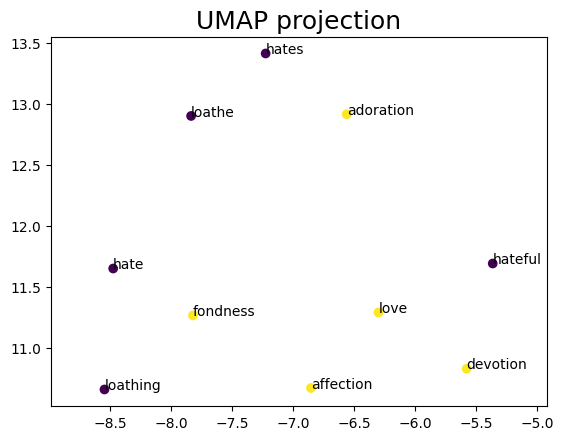

In [ ]:
fig, ax = plt.subplots()
ax.scatter(embedding[:, 0], embedding[:, 1], c=labels)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=18)
for i, j in enumerate(words):
    ax.annotate(j, (embedding[:, 0][i], embedding[:, 1][i]))

In [ ]:
n = selected_word_embeds.shape[0]
tsne_word_embeds = TSNE(n_components=2, learning_rate='auto', init='random', method='exact', perplexity=4, random_state=102).fit_transform(selected_word_embeds)
tsne_word_embeds = (tsne_word_embeds - tsne_word_embeds.mean(axis=0))/tsne_word_embeds.std(axis=0)

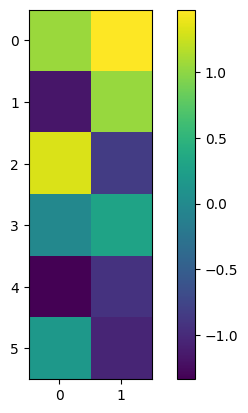

In [ ]:
plt.imshow(tsne_word_embeds)
plt.colorbar()
plt.show()

In [ ]:
# umap for embedding visualization